# Section 1: Linear Regression (40 points)

The goal of this section is to practice the Python implementation of two methods for training Linear Regression models: **normal equations** and **gradient descent**. See detailed instructions below. 

---

## Overview
The task is to build a linear regression model that predicts the GPAs of university students from two features, Math SAT and Verb SAT. 
- Task 1) Train the model using Normal Equation method. (12 pts)
- Task 2) Train the model using Gradient Descent method. (25 pts)
- Task 3) Play around with different learning rate $\alpha$s. (3 pts)

## Datasets
The file *sat_gpa.csv* contains all training and testing data. It has 105 rows and 3 columns. Each row is the record of a student. The three columns are <u>Math SAT score</u>, <u>Verb SAT score</u>, and <u>University GPA</u>. The first two columns are the features, and the third is the output. All data points are used as the training set.

## Import packages

In [68]:
import numpy as np
from numpy.linalg import inv # Used for computing the inverse of matrix

import matplotlib.pyplot as plt
# Use `pip install matplotlib` in command line if matplotlib is not installed

---
## Load data and preprocessing

In [69]:
# Load data 
data = np.loadtxt(open('sat_gpa.csv'), delimiter=',')
print('shape of original data:', data.shape) # Check if data is 105 by 3

# Normalize data
data_norm = data / data.max(axis=0)

shape of original data: (105, 3)


---
### Task 1 (12 points): Implement the Normal Equation method. 

Implement the Normal Equation method for linear regression: $\theta = (X^T X)^{-1}X^T y$

Use the learned $\theta$ to make predictions: $\hat{y} = X\theta$

Compute the mean squared error of the model: $MSE = 1/n \sum_i (\hat{y}^{(i)} - y^{(i)})^2$

In [70]:
# Create matrix X and y (4 pts)
# X has three columns: 
#   - The first column contain all 1s, which is for the intercept
#   - The second and third columns contain features, i.e., the 1st and 2nd columns of data_norm
# y has one column, i.e., the 3rd column of data_norm

X = np.ones_like(data_norm)
#### START YOUR CODE ####
X[:, 1:3] = data_norm[:,0:2]
y = data_norm[:,2]
#### END YOUR CODE ####


# Compute theta using normal equation method (4 pts)
# Hint: use the inv() function imported from numpy.linalg
#### START YOUR CODE ####
theta_method1 = inv(X.T.dot(X)).dot(X.T).dot(y)
#### END YOUR CODE ####


# Use the theta obtained to make predictions and compute the residuals (4 pts)
# Hint: use numpy.dot() and numpy.sum(), and avoid using for loops
#### START YOUR CODE ####
y_hat = X.dot(theta_method1)
n = y.shape[0]
MSE1 = np.sum((y - y_hat)**2) / n
#### END YOUR CODE ####

# Compute residuals
residuals = y_hat - y

#### DO NOT CHANGE THE CODE BELOW ####
print('Theta obtained from normal equation:', theta_method1)
print('Mean Squared Error: ', MSE1)

Theta obtained from normal equation: [-0.06234478  0.62017319  0.43647674]
Mean Squared Error:  0.0072290203647900324


### Expected ouput

Theta obtained from normal equation: | [-0.06234478  0.62017319  0.43647674]\
Mean Squared Error:  0.0072290203647900324

---

### Task 2 (25 points): Implement the Gradient Descent method for linear regression.

The cost function: $J(\theta_0, \theta_1, \theta_2) = \frac{1}{2m}\sum_i (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_i (\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} - y^{(i)})^2$

Gradients w.r.t. parameters: $\frac{\partial J}{\partial \theta} = \begin{cases}\frac{\partial J}{\partial \theta_0}\\ \frac{\partial J}{\partial \theta_1}\\ \frac{\partial J}{\partial \theta_2}\\ \end{cases} = \begin{cases}\frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_1^{(i)}\\ \frac{1}{m}\sum_i (\hat{y}^{(i)} - y^{(i)})x_2^{(i)}\\\end{cases}$

The formula to update parameters at each iteration: $\theta := \theta - \alpha * \frac{\partial J}{\partial \theta}$

Note that $X$, $y$, and $\theta$ are all vectors (numpy arrays), and thus the operations above should be implemented in a vectorized fashion. Use `numpy.sum()`, `numpy.dot()` and other vectorized functions, and avoid writing `for` loops in Python.

In [71]:
# Define the gradientDescent function
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    Params
        X - Shape: (m,3); m is the number of data examples
        y - Shape: (m,)
        theta - Shape: (3,)
        num_iters - Maximum number of iterations
    Return
        A tuple: (theta, MSE, cost_array)
        theta - the learned model parameters
        MSE - mean squared error
        cost_array - stores the cost value of each iteration. Its shape is (num_iters,)
    '''
    m = len(y)
    cost_array =[]

    for i in range(0, num_iters):
        #### START YOUR CODE ####
        # Make predictions (1 pts)
        # Shape of y_hat: m by 1
        y_hat = X.dot(theta)
        
        # Compute the difference between prediction (y_hat) and ground truth label (y) (1 pts)
        diff = y_hat - y

        # Compute the cost (1 pt)
        # Hint: Use the diff computed above
        cost = (1/(2*m)) * np.sum(diff**2)
        cost_array.append(cost)

        # Compute gradients (10 pts)
        # Hint: Use the diff computed above
        # Hint: Shape of gradients is the same as theta
        gradients = (1/m) * X.T.dot(diff)

        # Update theta (10 pts)
        theta = theta - (alpha * gradients)
        #### END YOUR CODE ####
    
    # Compute residuals (2 pts)
    # Hint: Should use the same code as Task 1
    #### START YOUR CODE ####
    y_hat = X.dot(theta)
    MSE = np.sum((y_hat - y)**2) / m
    #### END YOUR CODE ####

    return theta, MSE, cost_array

In [72]:
# This cell is to evaluate the gradientDescent function implemented above

#### DO NOT CHANGE THE CODE BELOW ####
# Define learning rate and maximum iteration number
ALPHA = 0.04
MAX_ITER = 600

# Initialize theta to [0,0,0]
theta = np.zeros(3)
theta_method2, MSE2, cost_array = gradientDescent(X, y, theta, ALPHA, MAX_ITER)

print('Theta obtained from gradient descent:', theta_method2)
print('Mean Squared Error (MSE): ', MSE2)

Theta obtained from gradient descent: [0.30079597 0.3213792  0.3115428 ]
Mean Squared Error (MSE):  0.008239773354207948


### Expected output

Theta obtained from gradient descent: | [0.29911574 0.32224209 0.31267172]\
Mean Squared Error (MSE):  0.008230095794638667

---

### Task 3 (3 points): Play around with learning rates. 

Plot the cost against iteration number. This is a common method of examining the performance of gradient descent.

Try different values of learning rate, for example, $\alpha=\{0.01, 0.005, 0.001\}$, and see how the cost curves change. 

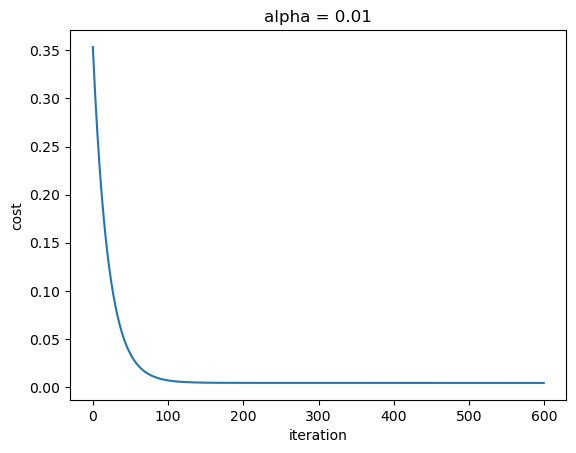

In [73]:
#### START YOUR CODE ####
alpha = 0.01
#### END YOUR CODE ####

theta = np.zeros(3)
_, _, cost_array = gradientDescent(X, y, theta, alpha, MAX_ITER)

plt.plot(range(0,len(cost_array)), cost_array);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}'.format(alpha))
plt.show()

# Section 2: Data Preprocessing ane Evaluation

You will practice on common data preprocessing and evaluation tasks in this section.

- Task 1: 5 points
- Task 2: 8 points
- Task 3: 8 points
- Task 4: 9 points

## Task 1 (5 pts): One-Hot Encoding

Implement a function one_hot_encode that takes a list of categorical values and returns their one-hot encoded representation.

In [74]:
import numpy as np
### START YOUR CODE ###
def one_hot_encode(categories):
    """
    Convert categorical values to one-hot encoding.
    
    Args:
        categories (list of str): A list of categorical values.
    
    Returns:
        np.ndarray: A one-hot encoded matrix.
    """
    unique_categories = np.unique(categories)  # TODO: Get unique categories (2 pts)
    encoding = np.zeros((len(categories), len(unique_categories)))  # TODO: Implement one-hot encoding logic (3 pts)
    for i, category in enumerate(categories):
        encoding[i, np.where(unique_categories == category)] = 1
    return encoding
### END YOUR CODE ###

#### DO NOT CHANGE THE CODE BELOW ####
categories = ["red", "blue", "green", "blue", "red"]
one_hot_encode(categories)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

**Expected output**
<!-- |&nbsp;|&nbsp; |           -->

[[1., 0., 0.],<br>
 [0., 1., 0.],<br>
 [0., 0., 1.],<br>
 [0., 1., 0.],<br>
 [1., 0., 0.]]<br>

or 
[[0. 1. 0.],<br>
 [1. 0. 0.],<br>
 [0. 0. 1.],<br>
 [1. 0. 0.],<br>
 [0. 1. 0.]]<br>
 
 or 
[[1. 0. 0.],<br>
 [0. 0. 1.],<br>
 [0. 1. 0.],<br>
 [0. 0. 1.],<br>
 [1. 0. 0.]<br>
 ]
 
 or 
[[0. 1. 0.],<br>
 [0. 0. 1.],<br>
 [1. 0. 0.],<br>
 [0. 0. 1.]],<br>
 [0. 1. 0.]]<br>
  
  or 
[[0. 0. 1.],<br>
 [1. 0. 0.],<br>
 [0. 1. 0.],<br>
 [1. 0. 0.],<br>
 [0. 0. 1.]]<br>
 ]

or 
[[0. 0. 1.],<br>
 [0. 1. 0.],<br>
 [1. 0. 0.],<br>
 [0. 1. 0.],<br>
 [0. 0. 1.]]
 ]

## Task 2 (8 pts): One-vs-One (OvO) Classification

One-vs-One (OvO) classification strategy involves training a separate classifier for every possible pair of classes.

In this task, we train a separate binary classifier for each possible pair of classes. With three classes (0, 1, 2), we train three classifiers:

Classifier 1: Class 0 vs. Class 1
Classifier 2: Class 0 vs. Class 2
Classifier 3: Class 1 vs. Class 2

In [75]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression

def one_vs_one(X, y):
    """
    Implements One-vs-One classification by training a binary classifier for each class pair.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target values (three classes: 0, 1, 2).
    
    Returns:
        dict: A dictionary where keys are class pairs (tuples) and values are trained classifiers.
    """
    classifiers = {}  # Dictionary to store classifiers
    classes = {0, 1, 2}  # Three unique class labels

    for class1, class2 in combinations(classes, 2):
        ### START YOUR CODE ###
        # TODO: Select only data belonging to class1 or class2
        mask = (y == class1) | (y == class2)  #2pts
        X_pair, y_pair = X[mask], y[mask]  #2pts

        # TODO: Convert labels to binary (1 for class1, 0 for class2)
        y_pair = (y_pair == class1).astype(int)  #2pts

        # TODO: Train a logistic regression classifier
        model = LogisticRegression()   
        model.fit(X_pair, y_pair)  # Train model #2pts

        # Store trained model
        classifiers[(class1, class2)] = model
        ### END YOUR CODE ###

    return classifiers

In [76]:
### Load data: DO NOT CHANGE THE CODE BELOW ###
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset from CSV
csv_path = "data.csv"  # Ensure the file is in the same directory
df = pd.read_csv(csv_path)

# Extract features and labels
X = df[["Feature1", "Feature2"]].values
y = df["Class"].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
### Evaluation: DO NOT CHANGE THE CODE BELOW ###
# Train OvO classifiers
ovo_models = one_vs_one(X_train, y_train)

# Function to make predictions using OvO classifiers
def ovo_predict(X_test, ovo_models):
    """
    Predict class labels using One-vs-One classifiers via majority voting.
    """
    votes = {i: np.zeros(len(X_test)) for i in range(3)}  # Vote count per class
    for (class1, class2), model in ovo_models.items():
        preds = model.predict(X_test)
        for i, pred in enumerate(preds):
            if pred == 1:
                votes[class1][i] += 1
            else:
                votes[class2][i] += 1
    return np.array([max(votes, key=lambda c: votes[c][i]) for i in range(len(X_test))])

# Evaluate OvO model
y_pred_ovo = ovo_predict(X_test, ovo_models)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"One-vs-One Accuracy: {accuracy_ovo:.2f}")

One-vs-One Accuracy: 0.96


**Expected output**

One-vs-One Accuracy: 0.96

## Task 3 (8 pts): One-vs-All (OvA) Classification

In One-vs-All (OvA) classification, we train a separate binary classifier for each class, treating that class as positive (1) and all other classes as negative (0).

For a dataset with three classes (0, 1, 2), we train three classifiers:

Classifier 1: Class 0 vs. (Class 1 + Class 2)
Classifier 2: Class 1 vs. (Class 0 + Class 2)
Classifier 3: Class 2 vs. (Class 0 + Class 1)

In [78]:
from sklearn.linear_model import LogisticRegression

def one_vs_all(X, y):
    """
    Implements One-vs-All classification by training a binary classifier for each class.
    
    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target values (three classes: 0, 1, 2).
    
    Returns:
        dict: A dictionary where keys are individual class labels and values are trained classifiers.
    """
    classifiers = {}  # Dictionary to store classifiers
    classes = {0, 1, 2}  # Three unique class labels

    for class_label in classes:
        ### START YOUR CODE ###
        # TODO: Convert labels to binary (1 for class_label, 0 for all other classes)
        y_binary = (y == class_label).astype(int)  #6pts

        # TODO: Train a logistic regression classifier
        model = LogisticRegression()    
        model.fit(X, y_binary)  # Train model #2pts

        # Store trained model
        classifiers[class_label] = model
        ### END YOUR CODE ###

    return classifiers


In [79]:
### Load data: DO NOT CHANGE THE CODE BELOW ###
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset from CSV
csv_path = "data.csv"  # Ensure the file is in the same directory
df = pd.read_csv(csv_path)

# Extract features and labels
X = df[["Feature1", "Feature2"]].values
y = df["Class"].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
### Evaluation: DO NOT CHANGE THE CODE BELOW ###
# Train OvA classifiers
ova_models = one_vs_all(X_train, y_train)

# Function to make predictions using OvA classifiers
def ova_predict(X_test, ova_models):
    """
    Predict class labels using One-vs-All classifiers by selecting the class with the highest probability.
    """
    probs = np.zeros((len(X_test), 3))  # Store probabilities for each class
    for class_label, model in ova_models.items():
        probs[:, class_label] = model.predict_proba(X_test)[:, 1]  # Probability of being class_label

    return np.argmax(probs, axis=1)  # Choose class with highest probability

# Evaluate OvA model
y_pred_ova = ova_predict(X_test, ova_models)
accuracy_ova = accuracy_score(y_test, y_pred_ova)
print(f"One-vs-All Accuracy: {accuracy_ova:.2f}")


One-vs-All Accuracy: 0.93


**Expected output**

One-vs-All Accuracy: 0.93

## Task 4 (9 pts): Implement Cross-Validation
Cross-validation is a model evaluation technique used to assess the performance of a model on unseen data. One common method is $k$-fold cross-validation, where the dataset is split into $k$ equal-sized folds. The model is trained on $k-1$ folds and tested on the remaining fold, and this process is repeated $k$ times.

Documentation from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [81]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

def k_fold_cross_validation(X, y, k=5):
    """
    Performs k-fold cross-validation for a logistic regression model.

    Args:
        X (np.ndarray): Feature matrix.
        y (np.ndarray): Target labels.
        k (int): Number of folds.

    Returns:
        list: A list containing accuracy scores for each fold.
    """
    accuracies = []  # Store accuracy for each fold

    ### START YOUR CODE ###
    # TODO: Initialize KFold in sklearb with k splits, shuffle=True, random_state=42, please read KFold documentation first
    kf = KFold(k, shuffle=True, random_state=42)  # 3 pts

    # TODO: Iterate through the folds and train a model for each
    for train_index, test_index in kf.split(X):  # TODO: Use kf.split() # 1 pt
        X_train, X_test = X[train_index], X[test_index]  # TODO: Split data # 1 pts
        y_train, y_test = y[train_index], y[test_index]  # TODO: Split labels # 1 pts

        # TODO: Initialize and train a logistic regression model
        model = LogisticRegression()  
        model.fit(X_train, y_train)  # Train model on training data  # 1 pt

        # TODO: Predict on the test fold
        y_pred = model.predict(X_test)  # 1 pt

        # TODO: Compute accuracy and store it
        acc = accuracy_score(y_test,y_pred)  # 1 pt
        accuracies.append(acc)
    ### END YOUR CODE ###

    return accuracies


In [82]:
### Evaluation: DO NOT CHANGE THE CODE BELOW ###
# Load dataset
csv_path = "data2.csv"  # Ensure the file is in the same directory
df = pd.read_csv(csv_path)

# Extract features and labels
X = df[["Feature1", "Feature2"]].values
y = df["Class"].values

# Perform k-fold cross-validation
cv_accuracies = k_fold_cross_validation(X, y, k=5)

# Print results
print(f"Cross-Validation Accuracies: {cv_accuracies}")
print(f"Mean Accuracy: {np.mean(cv_accuracies):.2f}")

Cross-Validation Accuracies: [0.8, 0.875, 0.925, 0.8, 0.925]
Mean Accuracy: 0.86


**Expected output**

Cross-Validation Accuracies: [0.8, 0.875, 0.925, 0.8, 0.925]
Mean Accuracy: 0.86

# Section 3: SVM (30 points)
- Task 1: 9 points
- Task 2: 9 points
- Task 3:  3 points
- Task 4: 9 points

In this assignment, we will build a "toy" SVM model using a mini dataset step by step.

For each **task** cell that requires your completion, you can run the **evaluation** cell right after it to check if your answer correct.
The output of the evaluation cell should be the same as the "expected output" provided. (Some mismatch in the last digit of floating numbers is tolerable)

---
# Install dependencies

**quadprog** is a Python package for solving quadratic programming problems. You can install it using the following command:
```
pip install quadprog
```
Note: Windows users may need to install Visual C++ 14 first (https://visualstudio.microsoft.com/visual-cpp-build-tools/).


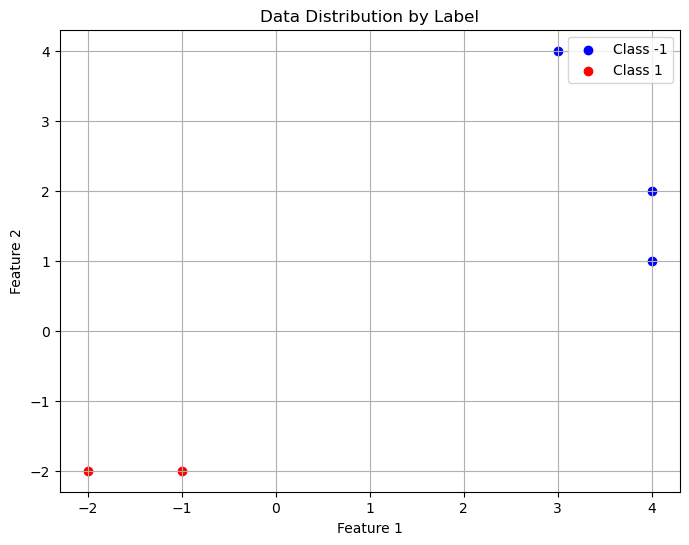

In [83]:
import quadprog
import numpy as np
import matplotlib.pyplot as plt


# The helper function. Dot not change it
def quadprog_solve_qp(P, q, G=None, h=None, A=None, b=None):
    qp_G = .5 * (P + P.T)   # make sure P is symmetric
    qp_a = -q
    if A is not None:
        qp_C = -np.vstack([A, G]).T
        qp_b = -np.hstack([b, h])
        meq = A.shape[0]
    else:  # no equality constraint
        qp_C = -G.T
        qp_b = -h
        meq = 0
    return quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

# Do not change the seed value
np.random.seed(0) 
# Generate synthetic dataset
X1 = np.round(np.random.randn(3, 2)).astype(int) + [2, 2]  # Class 1 (Shifted)
X2 = np.round(np.random.randn(2, 2)).astype(int) + [-2, -2]  # Class 2 (Shifted)
X = np.vstack((X1, X2))
Y = np.hstack((-np.ones(3), np.ones(2)))  # Labels: 0 and 1

# Plot the data distribution based on labels
plt.figure(figsize=(8,6))
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], color='blue', label='Class -1')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Distribution by Label")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Task 1
We want to build an SVM model on the synthetic dataset: 


$x^{(1)} = (4, 2),\ y^{(1)}=-1$

$x^{(2)} = (3, 4),\ y^{(2)}=-1$

$x^{(3)} = (4, 1),\ y^{(3)}=-1$

$x^{(4)} = (-1, -2),\ y^{(4)}=1$

$x^{(5)} = (-2, -2),\ y^{(5)}=1$
    
We need to solve the quadratic programming (QP) problem as the following form:

$
    \min_{\alpha}\big( \frac{1}{2}\alpha^{T}Q\alpha - (\textbf{1})^{T}\alpha \big) \\
    \text{subject to: } y^{T}\alpha=0,\ \alpha\geq 0
$

The quadprog package by defaualt solves the QP as this form:

$
    \min_{x}\big( \frac{1}{2}x^{T}Px + q^{T}x \big) \\
    \text{subject to: } Gx\leq h,\ Ax = b
$

Therefore, in order to use quadprog, we need to establish the responding relationships between variables: 
$P=Q$, $q = -(\textbf{1})^{T}$, $G = -(\textbf{1})^{T}$, $h=(\textbf{0})^{T}$, $A=y^T$, $b=(\textbf{0})^{T}$



---
### Task 1: Compute matrix $Q$

**9 points**

First, we need to use $x^{(i)}$ and $y^{(i)}$ to compute matrix $Q$:

$
    Q = \begin{bmatrix}
    y^{(1)}y^{(1)}x^{(1)T}x^{(1)} & y^{(1)}y^{(2)}x^{(1)T}x^{(2)} & \dots & y^{(1)}y^{(5)}x^{(1)T}x^{(5)} \\
    y^{(2)}y^{(1)}x^{(2)T}x^{(1)} & y^{(2)}y^{(2)}x^{(2)T}x^{(2)} & \dots & y^{(2)}y^{(5)}x^{(2)T}x^{(5)} \\
    \vdots & \vdots & \ddots & \vdots \\
    y^{(5)}y^{(1)}x^{(5)T}x^{(1)} & y^{(5)}y^{(2)}x^{(5)T}x^{(2)} & \dots & y^{(5)}y^{(5)}x^{(5)T}x^{(5)} \\
    \end{bmatrix}
$


In [84]:
Q = np.zeros((5, 5))

### START YOUR CODE ###
for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
        # Use the ith and jth examples in X and Y to compute Q_ij
        # Hint: Q_ij = y^i * y^j * (x^i @ x^j)
        Q[i, j] = Y[i] * Y[j] * (X[i] @ X[j])
### END YOUR CODE ###
print('Q = ', Q)

Q =  [[20. 20. 18.  8. 12.]
 [20. 25. 16. 11. 14.]
 [18. 16. 17.  6. 10.]
 [ 8. 11.  6.  5.  6.]
 [12. 14. 10.  6.  8.]]


### Expected output

**Q =**|[[ 20. 20. 18.  8. 12.] <br>[ 20. 25. 16. 11. 14.] <br> [ 18. 16. 17.  6. 10.] <br> [ 8. 11.  6.  5.  6.] <br> [ 12. 14. 10.  6.  8.]]

---
### Task 2: Computer other variables
**9 points**

Use the folumas: $P=Q$, $q = -(\textbf{1})^{T}$, $G = -(\textbf{1})^{T}$, $h=(\textbf{0})^{T}$, $A=y^T$, $b=(\textbf{0})^{T}$

In [85]:
### START YOUR CODE ###
P = Q + np.eye(5)*1e-5 # To solve the non-positive finite issue

# Hint: Use np.ones(), q is of length 5
q =  -np.ones(5)

# Hint: G is a matrix whose diagnal elements are 1s, and other elements are 0s. Use np.eye()
G = -np.eye(5)

# Hint: h is of length 5, with all zeros; Use np.zeros()
h = np.zeros(5)

A = Y.reshape((1,5))

# Hint: b is of length 1, with zero value; Use np.zeros()
b = np.zeros(1)

### END YOUR CODE ###

print('q = ', q)
print('G = ', G)
print('h = ', h)
print('b = ', b)

q =  [-1. -1. -1. -1. -1.]
G =  [[-1. -0. -0. -0. -0.]
 [-0. -1. -0. -0. -0.]
 [-0. -0. -1. -0. -0.]
 [-0. -0. -0. -1. -0.]
 [-0. -0. -0. -0. -1.]]
h =  [0. 0. 0. 0. 0.]
b =  [0.]


### Expected output

**q =**  [-1. -1. -1. -1. -1.]
**G =** [[-1. -0. -0. -0. -0.]<br> [-0. -1. -0. -0. -0.]<br> [-0. -0. -1. -0. -0.]<br> [-0. -0. -0. -1. -0.]<br> [-0. -0. -0. -0. -1.]]
**h =**  [0. 0. 0. 0. 0.]
**b =**  [0.]

---

### Task 3: Call quadprog
**3 point**

In [86]:
### START YOUR CODE ###

# Hint: Call quadprog_solve_qp() with the correct arguments
solution = quadprog_solve_qp(P,q,G,h,A,b)

### END YOUR CODE ###

print('solution = ', solution)
print('The support vectors are: ', X[solution > 0, ])

solution =  [-2.00367493e-13 -1.06676699e-18  5.88234948e-02  5.88234948e-02
 -6.16720023e-13]
The support vectors are:  [[ 4  1]
 [-1 -2]]


### Expected output

**solution $\approx$**|[0 0  0.06  0.06
 0]
**The support vectors are:** | [[4  1]<br> [-1 -2]]<br>

---
## Task 4: Solve the decision boundary
**9 points**

Use the support vectors to solve the $w$ and $b$ in the decision boundary $w^Tx+b=0$. Use the property that a support vector $x^{(k)}$ must satistify $y^{(k)}(w^Tx^{(k)}+b) = 1$. You can solve it with a paper and pen by listing linear equations.

**NOTE**: Solve this task on paper. You only need to provide the answers for `w1`, `w2`, and `b`. Please use the approximated soulution for calculating $\alpha$'s (i.e., solution).

*Hint*: You should solve the following linear equations:

$\begin{cases} y^{(3)}(w^Tx^{(3)}+b) = 1 \\ y^{(4)}(w^Tx^{(4)}+b) = 1 \end{cases}$

In [87]:
### START YOUR ANSWERS ###
w1 = -0.3
w2 = -0.18
b = 0.38
### END YOUR ANSWERS

print('w1 = ', w1)
print('w2 = ', w2)
print('b = ', b)

w1 =  -0.3
w2 =  -0.18
b =  0.38
